In [105]:
import mne
import matplotlib.pyplot as plt

In [106]:
raw = mne.io.read_raw_gdf('BCICIV_2a_gdf\A01T.gdf', preload=True)

Extracting EDF parameters from c:\Users\aliz0\OneDrive\Documents\GitHub\EEGTetris\ml\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\aliz0\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [107]:
channel_names = raw.info['ch_names']

print(channel_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [108]:
channels_to_keep = ['EEG-1', 'EEG-3', 'EEG-C3', 'EEG-C4', 'EEG-14', 'EEG-Pz', 'EEG-15']     # F3, F4, C3, C4, Pz, P3, P4

raw_subset = raw.copy().pick(channels_to_keep)

In [109]:
ordered_event_id = {
    '276'  : 1,
    '277'  : 2,
    '768'  : 3,
    '769'  : 4,
    '770'  : 5,
    '771'  : 6,
    '772'  : 7, 
    #'783'  : 8,
    '1023' : 9,
    '1072' : 10,
    '32766': 11
}

events, event_id = mne.events_from_annotations(raw_subset, event_id = ordered_event_id)

events[:10]     # format (sample_index, previous_event_value, event_id)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


array([[    0,     0,    11],
       [    0,     0,     1],
       [29683,     0,    11],
       [29683,     0,     2],
       [49955,     0,    11],
       [49955,     0,    10],
       [91518,     0,    11],
       [91868,     0,     3],
       [92368,     0,     7],
       [93871,     0,     3]])

In [110]:
# order_to_class_id = {
#     '1' : 'Idling Eyes Open',
#     '2' : 'Idling Eyes Closed',
#     '3' : 'Trial Start',
#     '4' : 'Cue Left',
#     '5' : 'Cue Right',
#     '6' : 'Cue Foot',
#     '7' : 'Cue Tongue', 
#     '8' : 'Cue Unknown',
#     '9' : 'Rejected Trial',
#     '10': 'Eye Movements',
#     '11': 'Next Run'
# }

# og_event_id = {
#     '276'  : 'Idling Eyes Open',
#     '277'  : 'Idling Eyes Closed',
#     '768'  : 'Trial Start',
#     '769'  : 'Cue Left',
#     '770'  : 'Cue Right',
#     '771'  : 'Cue Foot',
#     '772'  : 'Cue Tongue', 
#     '783'  : 'Cue Unknown',
#     '1023' : 'Rejected Trial',
#     '1072' : 'Eye Movements',
#     '32766': 'Next Run'
# }

In [111]:
data = raw_subset.get_data()

In [112]:
type(data), data.shape

(numpy.ndarray, (7, 672528))

In [113]:
## filtering done here; bandpassing between 8 and 35 Hz
raw_subset_8_13 = raw_subset.copy().filter(8, 13)
raw_subset_13_30 = raw_subset.copy().filter(13, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 s)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 255 samples (1.020 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished


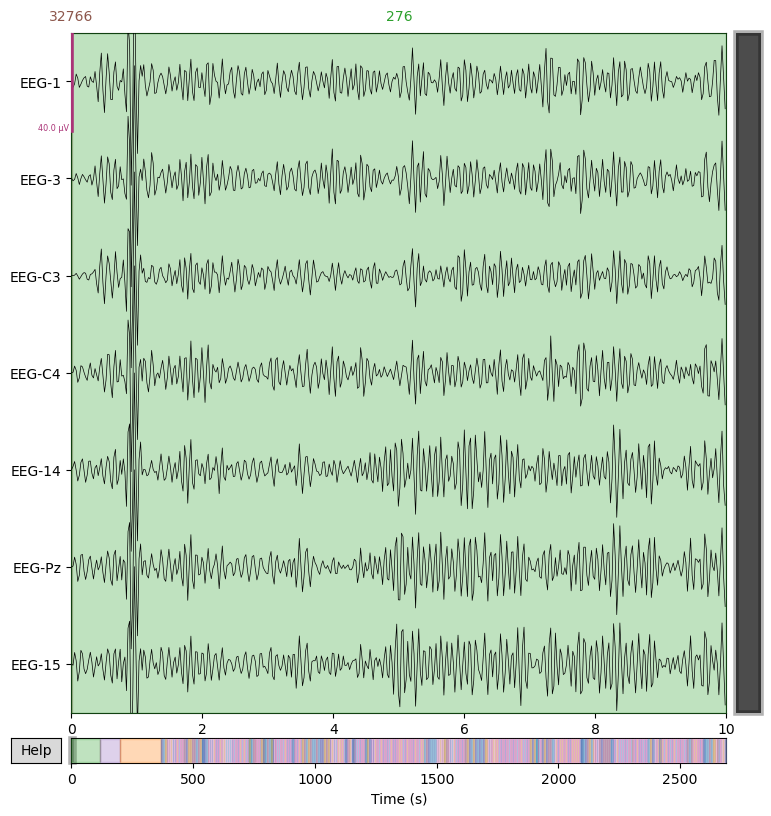

In [114]:
raw_subset_8_13.plot();

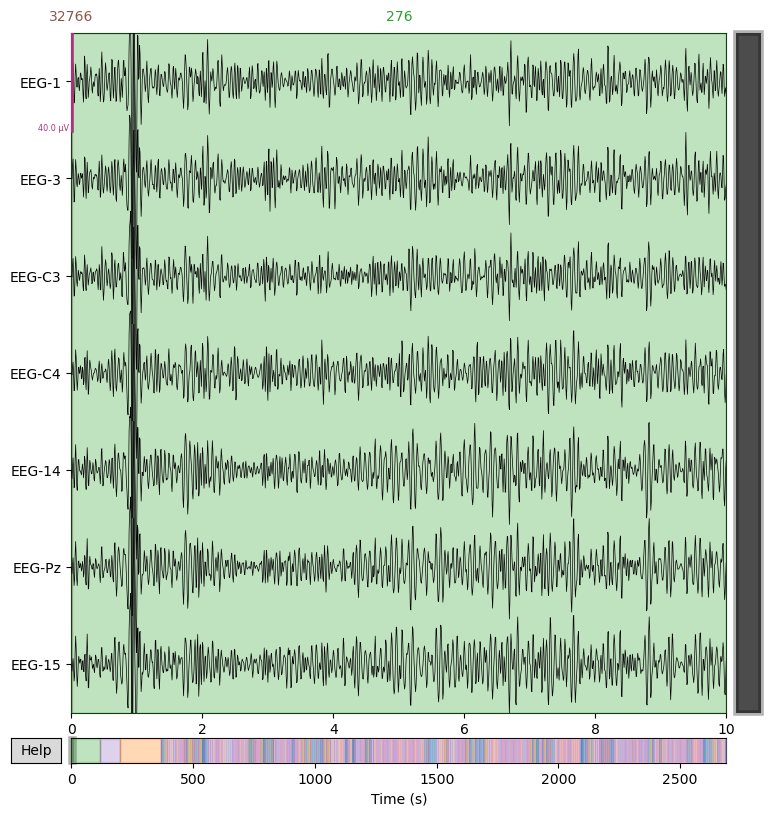

In [115]:

raw_subset_13_30.plot();

In [116]:
ica = mne.preprocessing.ICA(n_components=7, random_state=0)
ica.fit(raw_subset_8_13)

explained_var_ratio = ica.get_explained_variance_ratio(raw_subset_8_13)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )
for i in range(7):
    explained_var_ratio = ica.get_explained_variance_ratio(
        raw_subset_8_13, components=[i], ch_type="eeg"
    )
    # This time, print as percentage.
    ratio_percent = float(100 * explained_var_ratio["eeg"])
    print(
        f"Fraction of variance in EEG signal explained by {i} component: "
        f"{ratio_percent}%"
    )

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 4.8s.
Fraction of eeg variance explained by all components: 1.0
Fraction of variance in EEG signal explained by 0 component: 0.0010568418705059202%
Fraction of variance in EEG signal explained by 1 component: 16.989411157280042%
Fraction of variance in EEG signal explained by 2 component: 20.231802005816167%
Fraction of variance in EEG signal explained by 3 component: 18.74647581548836%
Fraction of variance in EEG signal explained by 4 component: 18.741030540134517%
Fraction of variance in EEG signal explained by 5 component: 16.65649484658285%
Fraction of variance in EEG signal explained by 6 component: 8.633728819747288%


In [117]:

# bad_idx, scores = ica.find_bads_eog(raw_subset_8_13, 'EEG-Pz', threshold=2) #something to tweak
ica.exclude = [0,-1]
# print(bad_idx, scores)

Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 7 PCA components


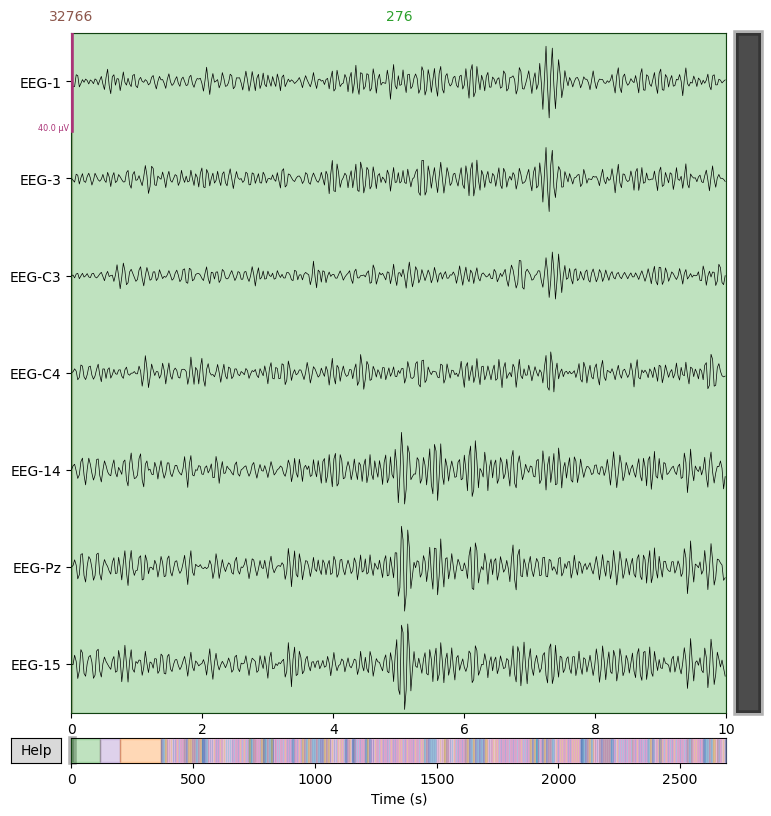

In [118]:
raw_subset_8_13_orig = raw_subset_8_13.copy()
raw_subset_8_13.load_data()
ica.apply(raw_subset_8_13)
raw_subset_8_13.plot();



In [119]:
ica = mne.preprocessing.ICA(n_components=7, random_state=0)
ica.fit(raw_subset_13_30)

explained_var_ratio = ica.get_explained_variance_ratio(raw_subset_13_30)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

for i in range(7):
    explained_var_ratio = ica.get_explained_variance_ratio(
        raw_subset_13_30, components=[i], ch_type="eeg"
    )
    # This time, print as percentage.
    ratio_percent = round(100 * explained_var_ratio["eeg"])
    print(
        f"Fraction of variance in EEG signal explained by {i} component: "
        f"{ratio_percent}%"
    )

Fitting ICA to data using 7 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 4.9s.
Fraction of eeg variance explained by all components: 1.0
Fraction of variance in EEG signal explained by 0 component: 0%
Fraction of variance in EEG signal explained by 1 component: 6%
Fraction of variance in EEG signal explained by 2 component: 24%
Fraction of variance in EEG signal explained by 3 component: 23%
Fraction of variance in EEG signal explained by 4 component: 16%
Fraction of variance in EEG signal explained by 5 component: 19%
Fraction of variance in EEG signal explained by 6 component: 12%


In [120]:
# bad_idx, scores = ica.find_bads_eog(raw_subset_13_30, 'EEG-Pz', threshold=2) #something to tweak
ica.exclude = [0,1]
# print(bad_idx, scores)


Applying ICA to Raw instance


    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 7 PCA components


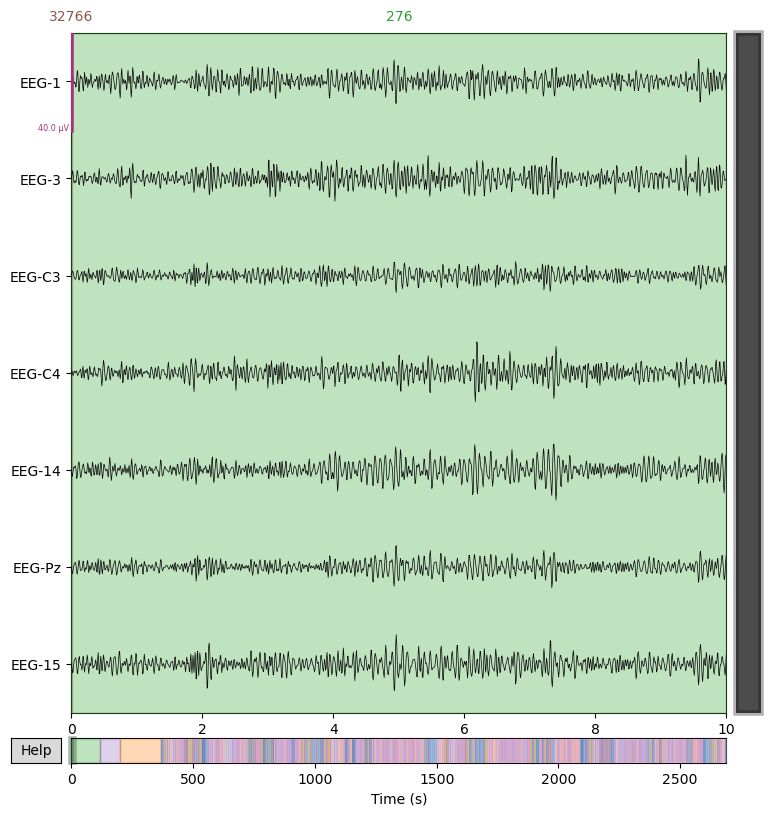

In [121]:
raw_subset_13_30_orig = raw_subset_13_30.copy()
raw_subset_13_30.load_data()
ica.apply(raw_subset_13_30)
raw_subset_13_30.plot();

In [122]:
events

array([[     0,      0,     11],
       [     0,      0,      1],
       [ 29683,      0,     11],
       ...,
       [670550,      0,      3],
       [670550,      0,      9],
       [671050,      0,      4]])

In [123]:
epochs = mne.Epochs(raw_subset, events, event_id=ordered_event_id, event_repeated='drop', preload=True)

Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
585 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 585 events and 176 original time points ...


1 bad epochs dropped


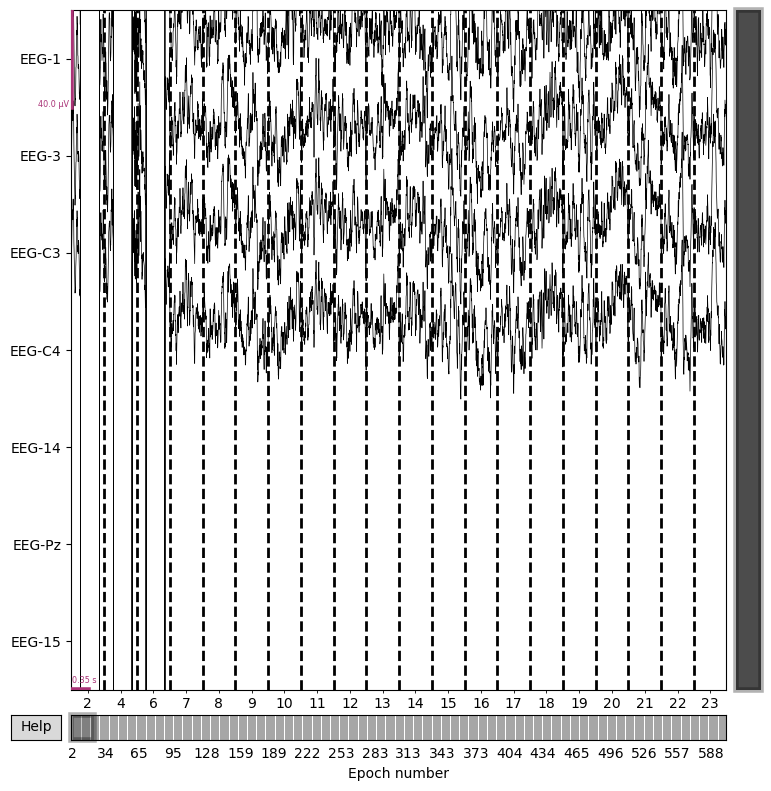

In [124]:
epochs.plot();

In [125]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 7 PCA components


C:\Users\aliz0\AppData\Local\Temp\ipykernel_31060\3077353632.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [126]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,584
Events,32766: 8768: 288769: 72770: 72771: 72772: 72
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s
